# Financial Instrument Class
### A class to easily analyse financial instruments

Financial Instrument is a base class, Risk Return is a super class

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('seaborn')
import fxcmpy


/var/folders/vt/l70v337s047_p4k5c0kp45200000gn/T/ipykernel_3131/72465036.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
class FinancialInstrumentBase():
    def __init__(self,ticker,start,end,api,frequency = 'D1'):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.frequency = frequency
        self.api = api
        self.get_data_fxcm()
        # self.get_data_Yfinance()
        self.log_returns()

    def __repr__(self):
        return f'FinancialInstrument({self._ticker},{self.start},{self.end})'

    # def get_data_Yfinance(self):
    #     raw = yf.download(self._ticker,self.start,self.end).Close.to_frame()
    #     raw = raw.rename(columns={'Close':'Price'})
    #     self.data = raw

    def get_data_fxcm(self):
        raw = self.api.get_candles(self._ticker, start = self.start, end = self.end, period = self.frequency)
        raw = raw['askclose'].to_frame()
        raw = raw.rename(columns={'askclose':'Price'})
        self.data = raw

    def log_returns(self):
        self.data['LogReturns'] = np.log(self.data.Price/self.data.Price.shift(1))
        # self.data.dropna(inplace=True)
    
    def plot_prices(self):
        '''Plot the prices of the financial instrument
        '''
        self.data.Price.plot(figsize=(12,8),title=self._ticker)
        plt.show()

    def plot_log_returns(self,kind='ts'):
        if kind=='ts':
            self.data.LogReturns.plot(figsize=(12,8),title=self._ticker)
            plt.show()
        if kind=='hist':
            # self.data.LogReturns.hist(bins=int(np.sqrt(len(self.data))),figsize=(12,8))
            self.data.LogReturns.hist(bins=100,figsize=(12,8))
            plt.show()
    
    def plot_log_returns_density(self):
        self.data.LogReturns.plot(kind='kde',figsize=(12,8))
        plt.show()

    def set_ticker(self,ticker):
        self._ticker = ticker
        self.get_data_Yfinance()
        self.log_returns()
    

In [3]:
class RiskReturn(FinancialInstrumentBase):
    def __init__(self,ticker,start,end,freq=None):
        super().__init__(ticker,start,end)
        self.freq = freq
        

    def __repr__(self):
        return f'RiskReturn({self._ticker},{self.start},{self.end})'

    def mean_return(self, freq=None):
        if freq is None:
            return self.data.LogReturns.mean()
        else:
            resampled_price = self.data.Price.resample(freq).last()
            resampled_log_returns = np.log(resampled_price/resampled_price.shift(1))
            return resampled_log_returns.mean()

    def std_return(self, freq=None):
        if freq is None:
            return self.data.LogReturns.std()
        else:
            resampled_price = self.data.Price.resample(freq).last()
            resampled_log_returns = np.log(resampled_price/resampled_price.shift(1))
            return resampled_log_returns.std()

    def annualized_performance(self):
        mean_return = round(self.data.LogReturns.mean()*252,4)
        std_return = round(self.data.LogReturns.std()*np.sqrt(252),4)
        print(f"Return: {mean_return} ||  Risk: {std_return}")

In [4]:
api = fxcmpy.fxcmpy(config_file= "FXCM.cfg")

In [5]:
stocks = FinancialInstrumentBase('AUD/CAD','2010-01-01','2011-01-02',api,'D1')

In [6]:
stocks.data

,Price,LogReturns
date,,
2010-01-04 22:00:00,0.95143,NaN
2010-01-05 22:00:00,0.94822,-0.003380
2010-01-06 22:00:00,0.95025,0.002139
2010-01-07 22:00:00,0.94958,-0.000705
2010-01-08 22:00:00,0.95268,0.003259
...,...,...
2010-12-27 22:00:00,1.01200,0.000573
2010-12-28 22:00:00,1.01171,-0.000287
2010-12-29 22:00:00,1.01894,0.007121


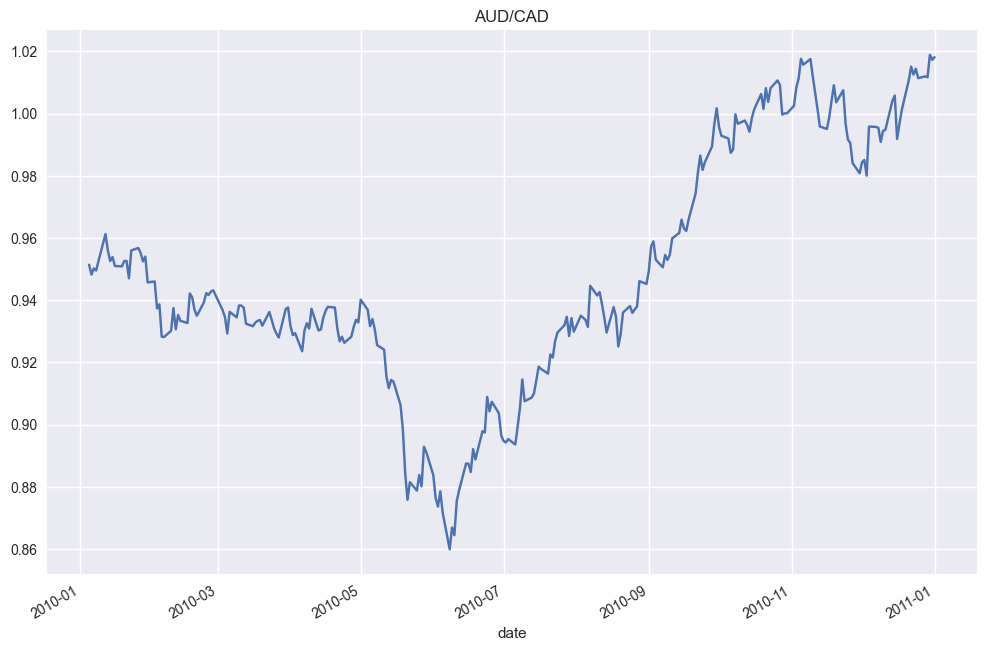

packet queue is empty, aborting
packet queue is empty, aborting
packet queue is empty, aborting
packet queue is empty, aborting


In [8]:
stocks.plot_prices()